## Connect to database

In [3]:
# Connect to Postgres
import os
import psycopg2
def newCursor():
    try:
        connection = psycopg2.connect(user = os.environ["DB_USER"],
                                      host = os.environ["DB_HOST"],
                                      password = os.environ["DB_PASSWORD"],
                                      port = "5432",
                                      database = os.environ["DB_DATABASE"])

        cursor = connection.cursor()
        return cursor

    except (Exception, psycopg2.Error) as error:
        print("Error while connecting to PostgreSQL", error)
        return error
    
print(os.environ["DB_USER"])

ds_pilot


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
c = newCursor()
q = """
SELECT *
FROM api."WEETS_reference_SyntheticIndividuals"
WHERE sex = 'female' -- and age >=18
"""

c.execute(q)
cols = [desc[0] for desc in c.description]
df = pd.DataFrame(c.fetchall(), columns=cols)
df.head(20)
    
df = df[['age', 'ethnic_group', 'nationality', 'marital_and_civil_partnership_status', 
    'no_of_dependents', 'residential_status', 'highest_level_of_qualifications', 'employment_status', 
    'have_a_mortgage', 'have_other_borrowing', 'uk_passport_no', 'residence_permit_no', 'international_passport', 
    'drivers_license_no', 'credit_rating']]
    
df.head()    

,age,ethnic_group,nationality,marital_and_civil_partnership_status,no_of_dependents,residential_status,highest_level_of_qualifications,employment_status,have_a_mortgage,have_other_borrowing,uk_passport_no,residence_permit_no,international_passport,drivers_license_no,credit_rating
0,59.47,White,United Kingdom,Married / civil partnership,two,Owned with a mortgage or loan,Level 1,Employee: Full-time,Yes,No,5302338224GBR,,,,Good
1,3.74,White,Italy,Single,zero,Living rent free,No qualifications,Other,No,No,,CC40601219,T99347956380ITA,,
2,53.41,White,United Kingdom,Single,one,Owned outright,Level 1,Homemaker,No,No,1366019281GBR,,,SMITH640147L99AM,Fair
3,52.42,White,United Kingdom,Single,two,Owned outright,Level 4 or above,Employee: Full-time,No,No,2715365418GBR,,,HARRI640098F99QN,Fair
4,74.32,White,United Kingdom,Single,three or more,Owned outright,No qualifications,Retired,No,No,3514153243GBR,,,KAUR9451196B99NZ,Excellent


In [ ]:
df.head(20)

## Data Wrangling

#### Changing columns

In [173]:
# changing age column to float
df['age'] = df['age'].astype(float)

# credit rating must exist
df = df[df['credit_rating'] != '']

# all individuals with credit_ratings have children

df.head()

,age,ethnic_group,nationality,marital_and_civil_partnership_status,no_of_dependents,residential_status,highest_level_of_qualifications,employment_status,have_a_mortgage,have_other_borrowing,uk_passport_no,residence_permit_no,international_passport,drivers_license_no,credit_rating
0,59.47,White,United Kingdom,Married / civil partnership,two,Owned with a mortgage or loan,Level 1,Employee: Full-time,Yes,No,5302338224GBR,,,,Good
2,53.41,White,United Kingdom,Single,one,Owned outright,Level 1,Homemaker,No,No,1366019281GBR,,,SMITH640147L99AM,Fair
3,52.42,White,United Kingdom,Single,two,Owned outright,Level 4 or above,Employee: Full-time,No,No,2715365418GBR,,,HARRI640098F99QN,Fair
4,74.32,White,United Kingdom,Single,three or more,Owned outright,No qualifications,Retired,No,No,3514153243GBR,,,KAUR9451196B99NZ,Excellent
5,91.35,Black / African / Caribbean / Black British,United Kingdom,Separated,one,Owned with a mortgage or loan,Level 4 or above,Retired,Yes,No,,,,,Good


In [175]:
df.head()

,age,ethnic_group,nationality,marital_and_civil_partnership_status,no_of_dependents,residential_status,highest_level_of_qualifications,employment_status,have_a_mortgage,have_other_borrowing,uk_passport_no,residence_permit_no,international_passport,drivers_license_no,credit_rating
0,59.47,White,United Kingdom,Married / civil partnership,two,Owned with a mortgage or loan,Level 1,Employee: Full-time,Yes,No,5302338224GBR,,,,Good
2,53.41,White,United Kingdom,Single,one,Owned outright,Level 1,Homemaker,No,No,1366019281GBR,,,SMITH640147L99AM,Fair
3,52.42,White,United Kingdom,Single,two,Owned outright,Level 4 or above,Employee: Full-time,No,No,2715365418GBR,,,HARRI640098F99QN,Fair
4,74.32,White,United Kingdom,Single,three or more,Owned outright,No qualifications,Retired,No,No,3514153243GBR,,,KAUR9451196B99NZ,Excellent
5,91.35,Black / African / Caribbean / Black British,United Kingdom,Separated,one,Owned with a mortgage or loan,Level 4 or above,Retired,Yes,No,,,,,Good


In [176]:
#df = df[~df['credit_rating'].isin([''])]

df['is_credit_good'] = np.where(df.loc[:, 'credit_rating'].isin(['Fair', 'Poor']), 0, 1) 
df = df.drop('credit_rating', axis=1)

df['is_poc'] = np.where(df.loc[:, 'ethnic_group'].isin(['White']), 0, 1) 
df = df.drop('ethnic_group', axis=1)

df['is_foreign_national'] = np.where(df.loc[:, 'nationality'].isin(['United Kingdom']), 0, 1) 
df = df.drop('nationality', axis=1)

df['is_single'] = np.where(df.loc[:, 'marital_and_civil_partnership_status'].isin(['Single']), 0, 1) 
df = df.drop('marital_and_civil_partnership_status', axis=1)

df['has_children'] = np.where(df.loc[:, 'no_of_dependents'].isin(['zero']), 0, 1) 
df = df.drop('no_of_dependents', axis=1)

df['is_home_owner'] = np.where(df.loc[:, 'residential_status'].isin(['Living rent free',
       'Owned outright', 'Rented from council (Local Authority)',
       'Social rented', 'Private rented', 'Other']), 0, 1) 
df = df.drop('residential_status', axis=1)

df['has_qualifications'] = np.where(df.loc[:, 'highest_level_of_qualifications'].isin(['No qualifications']), 0, 1) 
df = df.drop('highest_level_of_qualifications', axis=1)

df['is_working'] = np.where(df.loc[:, 'employment_status'].isin(['Other', 'Unemployed']), 0, 1) 
df = df.drop('employment_status', axis=1)

df['has_a_mortgage'] = np.where(df.loc[:, 'have_a_mortgage'].isin(['No']), 0, 1) 
df = df.drop('have_a_mortgage', axis=1)

df['has_uk_passport'] = np.where(df.loc[:, 'uk_passport_no'].isin(['']), 0, 1) 
df = df.drop('uk_passport_no', axis=1)

df['has_other_borrowing'] = np.where(df.loc[:, 'have_other_borrowing'].isin(['No']), 0, 1) 
df = df.drop('have_other_borrowing', axis=1)

df['has_residence_permit'] = np.where(df.loc[:, 'residence_permit_no'].isin(['']), 0, 1) 
df = df.drop('residence_permit_no', axis=1)

df['has_international_passport'] = np.where(df.loc[:, 'international_passport'].isin(['']), 0, 1) 
df = df.drop('international_passport', axis=1)

df['has_drivers_license'] = np.where(df.loc[:, 'drivers_license_no'].isin(['']), 0, 1) 
df = df.drop('drivers_license_no', axis=1)



df.head(20) # has_children column is broken

# def data_preprocessing(col_name, new_col_name, zero_list):
#     global df
#     df[new_col_name] = np.where(df.loc[:, col_name].isin(zero_list), 0, 1) 
#     df = df.drop(col_name, axis=1)
    
#     return df

#data_preprocessing('credit_rating', 'is_credit_good')


#df = df.drop('ethnic_group', axis=1)

# df['has_uk_passport'] = if_exists('uk_passport_no')

# df['has_residence_permit'] = if_exists('residence_permit_no')

# df['has_international_passport'] = if_exists('')


,age,no_of_dependents,is_credit_good,is_poc,is_foreign_national,is_single,has_children,is_home_owner,has_qualifications,is_working,has_a_mortgage,has_uk_passport,has_other_borrowing,has_residence_permit,has_international_passport,has_drivers_license
0,59.47,two,1,0,0,1,1,1,1,1,1,1,0,0,0,0
2,53.41,one,0,0,0,0,1,0,1,1,0,1,0,0,0,1
3,52.42,two,0,0,0,0,1,0,1,1,0,1,0,0,0,1
4,74.32,three or more,1,0,0,0,1,0,0,1,0,1,0,0,0,1
5,91.35,one,1,1,0,1,1,1,1,1,1,0,0,0,0,0
6,69.50,one,1,0,1,1,1,0,1,1,0,0,0,1,1,0
7,32.31,one,1,0,0,1,1,0,1,1,0,1,0,0,0,1
8,58.44,one,1,1,1,1,1,0,1,1,0,0,0,1,1,1
9,31.22,one,1,0,0,1,1,1,0,1,1,1,0,0,0,1
10,35.84,two,1,0,0,1,1,0,1,1,0,0,0,0,0,0


In [177]:
df.shape

(203928, 16)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 <a list of 15 Text major ticklabel objects>)

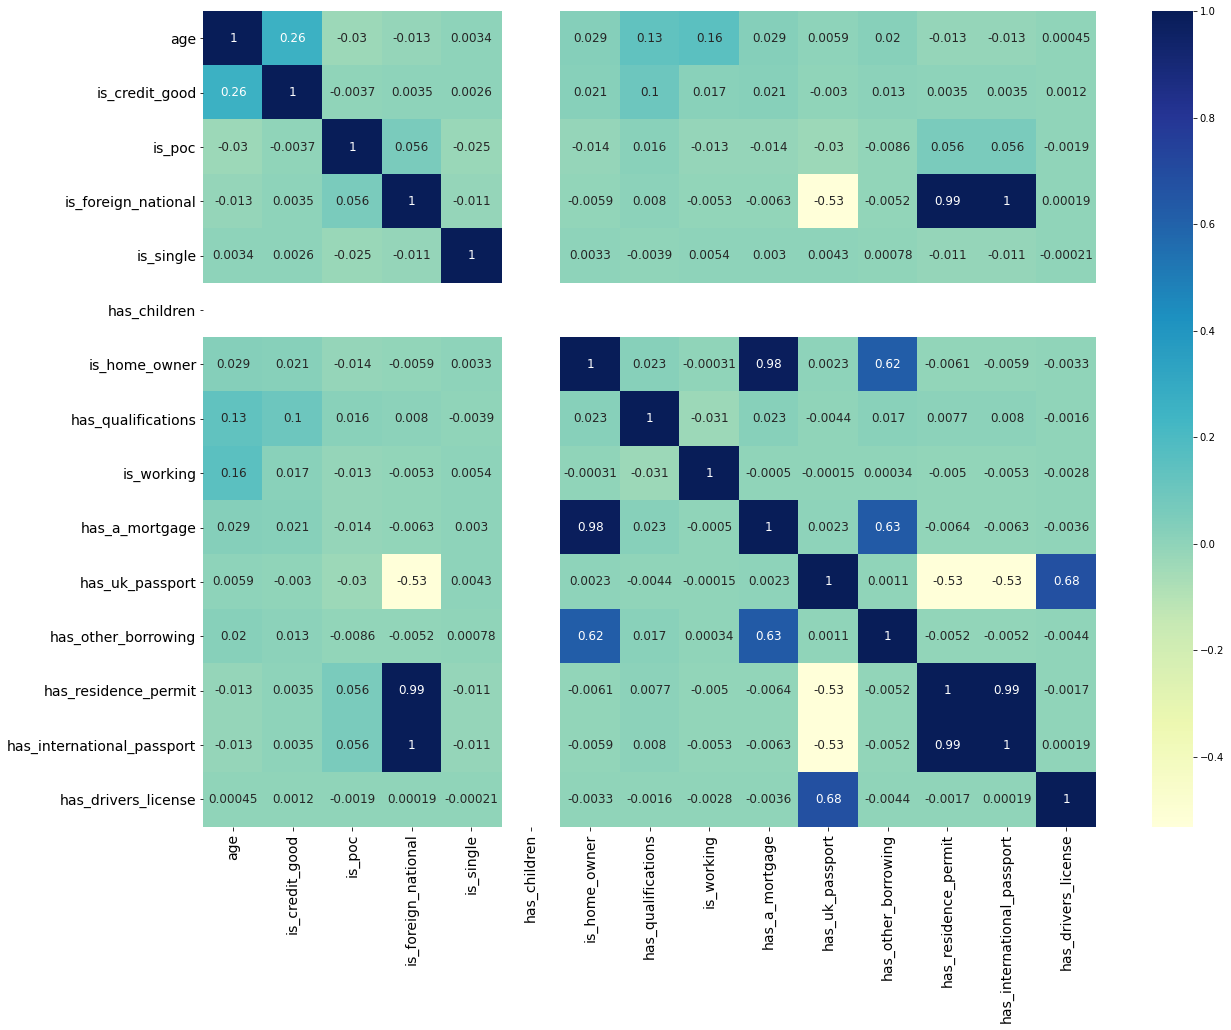

In [178]:
# correlation matrix showing correlation co-effiecients 
corr_matrix = df.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Modelling

### Using the elbow method to find the optimal number of clusters

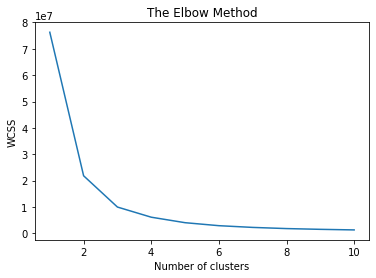

In [184]:
# K-Means clustering

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [185]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)
kmeans.labels_
kmeans.predict([[46, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1]])
kmeans.cluster_centers_

array([[30.2591802 ,  0.8552135 ,  0.14073616,  0.09829965,  0.65192062,
         1.        ,  0.31571611,  0.66906882,  0.82851808,  0.32233079,
         0.73121786,  0.16102731,  0.09726076,  0.09829965,  0.75015452],
       [53.14801854,  0.82844373,  0.1286105 ,  0.09238877,  0.65439264,
         1.        ,  0.33211927,  0.7668868 ,  0.80546995,  0.33924355,
         0.73473417,  0.17062237,  0.09144153,  0.09238877,  0.74903609],
       [76.08007274,  1.        ,  0.11509541,  0.08732288,  0.65692424,
         1.        ,  0.34109201,  0.76850557,  1.        ,  0.34808237,
         0.73956169,  0.17494804,  0.0864727 ,  0.08732288,  0.75104855]])

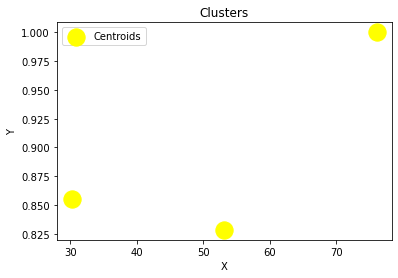

In [186]:
#plt.scatter(df[y_kmeans == 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], X[y_kmeans == 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], s = 100, c = 'red', label = 'Cluster 1')
#plt.scatter(df[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(df[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()